In [2]:
import iaml01cw2_helpers
import iaml01cw2_my_helpers
import numpy as np
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from math import sqrt
import math
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

/Users/lainuolin/anaconda2/envs/py3iaml/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Sequence
/Users/lainuolin/anaconda2/envs/py3iaml/lib/python3.7/site-packages/sklearn/model_selection/_split.py:18: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/Users/lainuolin/anaconda2/envs/py3iaml/lib/python3.7/site-packages/sklearn/model_selection/_search.py:16: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping, namedtuple, defaultdict, Sequence


In [6]:
Xtrn, Ytrn, Xtst, Ytst = iaml01cw2_helpers.load_FashionMNIST('data')
X_mean, Xtrn_nm, Xtst_nm = iaml01cw2_my_helpers.preprocessing(Xtrn, Ytrn, Xtst, Ytst)

In [7]:
# Q2.1
def iaml01cw2_q2_1(Xtrn_nm,Ytrn,Xtst_nm,Ytst):
    mlr= LogisticRegression().fit(Xtrn_nm,Ytrn)
    accuracy=mlr.score(Xtst_nm,Ytst)
    Ytst_pred=mlr.predict(Xtst_nm)
    c_m=confusion_matrix(Ytst,Ytst_pred)
    return mlr,accuracy,c_m
mlr,accuracy,c_m=iaml01cw2_q2_1(Xtrn_nm,Ytrn,Xtst_nm,Ytst)
print(accuracy)
print(c_m)

0.8401
[[819   3  15  50   7   4  89   1  12   0]
 [  5 953   4  27   5   0   3   1   2   0]
 [ 27   4 731  11 133   0  82   2   9   1]
 [ 31  15  14 866  33   0  37   0   4   0]
 [  0   3 115  38 760   2  72   0  10   0]
 [  2   0   0   1   0 911   0  56  10  20]
 [147   3 128  46 108   0 539   0  28   1]
 [  0   0   0   0   0  32   0 936   1  31]
 [  7   1   6  11   3   7  15   5 945   0]
 [  0   0   0   1   0  15   1  42   0 941]]


In [8]:
# Q2.2
def iaml01cw2_q2_2(Xtrn_nm,Ytrn,Xtst_nm,Ytst):
    msvc=SVC(gamma='auto').fit(Xtrn_nm,Ytrn)
    accuracy_svc=msvc.score(Xtst_nm,Ytst)
    Ytst_pred_svc=msvc.predict(Xtst_nm)
    c_msvc=confusion_matrix(Ytst,Ytst_pred_svc)
    return msvc,accuracy_svc,c_msvc
msvc,accuracy_svc,c_msvc=iaml01cw2_q2_2(Xtrn_nm,Ytrn,Xtst_nm,Ytst)
print(accuracy_svc)
print(c_msvc)

0.8461
[[845   2   8  51   4   4  72   0  14   0]
 [  4 951   7  31   5   0   1   0   1   0]
 [ 15   2 748  11 137   0  79   0   8   0]
 [ 32   6  12 881  26   0  40   0   3   0]
 [  1   0  98  36 775   0  86   0   4   0]
 [  0   0   0   1   0 914   0  57   2  26]
 [185   1 122  39  95   0 533   0  25   0]
 [  0   0   0   0   0  34   0 925   0  41]
 [  3   1   8   5   2   4  13   4 959   1]
 [  0   0   0   0   0  22   0  47   1 930]]


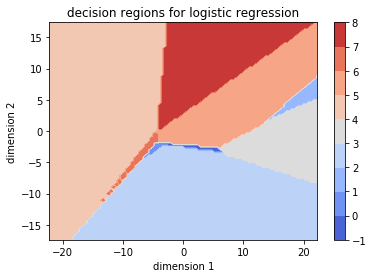

In [38]:
# Q2.3
def iaml01cw2_q2_3(Xtrn_nm):
    pca=PCA(n_components=2).fit(Xtrn_nm)
    Xtrn_nm_2D=pca.transform(Xtrn_nm)
    x1=Xtrn_nm_2D[:,0]
    x2=Xtrn_nm_2D[:,1]
    sigma1=np.std(x1,axis=0)
    sigma2=np.std(x2,axis=0)
    x=np.array(np.linspace(-5*sigma1,5*sigma1,100))
    y=np.array(np.linspace(-5*sigma2,5*sigma2,100))
    X,Y=np.meshgrid(x,y)
    x_2d=np.vstack((x,y)).T
    inverse_data=pca.inverse_transform(np.vstack((X.ravel(),Y.ravel())).T)
    mlr_pred=mlr.predict(inverse_data)
    Z=mlr_pred.reshape(X.shape)
    plt.figure()
    plt.contourf(X,Y,Z,cmap='coolwarm',levels=np.linspace(-1,8,10))
    plt.title('decision regions for logistic regression')
    plt.ylabel('dimension 2')
    plt.xlabel('dimension 1')
    plt.colorbar().set_ticks(np.linspace(-1,8,10))
    plt.show()
    return X,Y,inverse_data
X,Y,inverse_data=iaml01cw2_q2_3(Xtrn_nm)
#Only 8 class in this decision region, which mean that not all the class in PCA 2D space plane
#in this space plane, 5 class can be classified by decision boundary clearly.3 classes have litte place in this plane

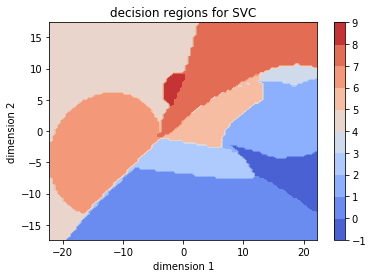

In [33]:
# Q2.4
def iaml01cw2_q2_4(X,Y,inverse_data):
    msvc_pred=msvc.predict(inverse_data)
    Z2=msvc_pred.reshape(X.shape)
    plt.figure()
    plt.contourf(X,Y,Z2,cmap='coolwarm',levels=np.linspace(-1,9,11))
    plt.title('decision regions for SVC')
    plt.ylabel('dimension 2')
    plt.xlabel('dimension 1')
    plt.colorbar().set_ticks(np.linspace(-1,9,11))
    plt.show()
iaml01cw2_q2_4(X,Y,inverse_data)

21.544346900318846
0.8455970941000882


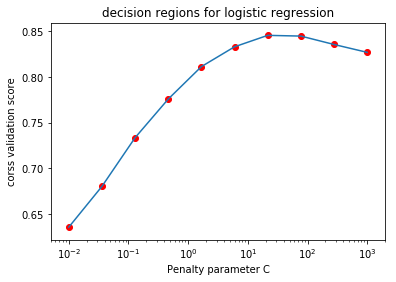

In [35]:
# Q2.5
def iaml01cw2_q2_5(Xtrn_nm,Ytrn,Xtst_nm,Ytst):
    XYsmall=[]
    XYtrn_nm=np.c_[Xtrn_nm,Ytrn]
    for a in np.arange(0,10,1):
        c=XYtrn_nm[np.where(Ytrn==a)]
        c=c[0:1000,:]
        XYsmall.append(c)
    XYsmall=np.array(XYsmall).ravel().reshape(10000,785)
    Xsmall=XYsmall[:,0:783]
    Ysmall=XYsmall[:,784]
    accu=[]
    n=np.logspace(-2,3,10)
    for d in n:
        svc=SVC(C=d,gamma='auto').fit(Xsmall,Ysmall)
        accu_svc=cross_val_score(svc,Xtst_nm,Ytst,cv=3)
        accu.append(accu_svc)
    mean_accu=np.array(accu).mean(axis=1)
    plt.plot(n,mean_accu)
    plt.xscale('log')
    plt.scatter(n,mean_accu,c='red')
    plt.xscale('log')
    plt.title('decision regions for logistic regression')
    plt.ylabel('corss validation score')
    plt.xlabel('Penalty parameter C')
    C_max=n[np.argmax(mean_accu)]
    print(C_max)
    Accu_max=np.max(mean_accu)
    print(Accu_max)
    return C_max,Accu_max
C_max,Accu_max=iaml01cw2_q2_5(Xtrn_nm,Ytrn,Xtst_nm,Ytst)

In [34]:
C_max

21.544346900318846

In [27]:
# Q2.6
def iaml01cw2_q2_6(C_max,Xtrn_nm,Ytrn):
    osvc=SVC(C=C_max,gamma='auto').fit(Xtrn_nm,Ytrn)
    accu_osvc_trn=osvc.score(Xtrn_nm,Ytrn)
    accu_osvc_tst=osvc.score(Xtst_nm,Ytst)
    print(accu_osvc_trn,accu_osvc_tst)
iaml01cw2_q2_6(C_max,Xtrn_nm,Ytrn)

0.9084166666666667 0.8765
